# Coursework 1  - Exercise 2

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, learning_rule.learning_rate

In [15]:
def plot_stats(stat, title=None, save=False, filename=None):
    stats, keys, run_time, _, _, _, _, _ = stat
    fig, axs = plt.subplots(2,1, figsize=(6,8))
    
    if title is not None:
#         learn_rate = title.split(",")[0]
        plt.suptitle(title)

    for k in ['error(train)', 'error(valid)']:
        axs[0].plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    axs[0].legend(loc=0)
    axs[0].set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    for k in ['acc(train)', 'acc(valid)']:
        axs[1].plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    axs[1].legend(loc=0)
    axs[1].set_xlabel('Epoch number')
    
    if(save):
        plt.savefig(filename + ".pdf")

In [3]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=200, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=200, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f464c3b0908>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f464c3b0908>)


Epoch 5: 1.0s to complete
    error(train)=2.07e+00, acc(train)=4.51e-01, error(valid)=2.07e+00, acc(valid)=4.48e-01


Epoch 10: 1.0s to complete
    error(train)=1.37e+00, acc(train)=6.14e-01, error(valid)=1.37e+00, acc(valid)=6.10e-01


Epoch 15: 1.0s to complete
    error(train)=1.15e+00, acc(train)=6.72e-01, error(valid)=1.16e+00, acc(valid)=6.66e-01


Epoch 20: 1.0s to complete
    error(train)=1.01e+00, acc(train)=7.08e-01, error(valid)=1.02e+00, acc(valid)=7.04e-01


Epoch 25: 1.0s to complete
    error(train)=8.98e-01, acc(train)=7.36e-01, error(valid)=9.10e-01, acc(valid)=7.28e-01


Epoch 30: 1.0s to complete
    error(train)=8.26e-01, acc(train)=7.53e-01, error(valid)=8.44e-01, acc(valid)=7.46e-01


Epoch 35: 1.0s to complete
    error(train)=7.64e-01, acc(train)=7.69e-01, error(valid)=7.84e-01, acc(valid)=7.63e-01


Epoch 40: 1.0s to complete
    error(train)=7.17e-01, acc(train)=7.82e-01, error(valid)=7.41e-01, acc(valid)=7.75e-01


Epoch 45: 1.0s to complete
    error(train)=6.84e-01, acc(train)=7.90e-01, error(valid)=7.10e-01, acc(valid)=7.81e-01


Epoch 50: 1.0s to complete
    error(train)=6.52e-01, acc(train)=7.98e-01, error(valid)=6.80e-01, acc(valid)=7.85e-01


Epoch 55: 1.0s to complete
    error(train)=6.25e-01, acc(train)=8.07e-01, error(valid)=6.58e-01, acc(valid)=7.96e-01


Epoch 60: 1.0s to complete
    error(train)=6.04e-01, acc(train)=8.10e-01, error(valid)=6.41e-01, acc(valid)=7.99e-01


Epoch 65: 1.0s to complete
    error(train)=5.82e-01, acc(train)=8.16e-01, error(valid)=6.22e-01, acc(valid)=8.06e-01


Epoch 70: 1.0s to complete
    error(train)=5.70e-01, acc(train)=8.19e-01, error(valid)=6.12e-01, acc(valid)=8.07e-01


Epoch 75: 1.0s to complete
    error(train)=5.50e-01, acc(train)=8.25e-01, error(valid)=5.96e-01, acc(valid)=8.09e-01


Epoch 80: 1.1s to complete
    error(train)=5.38e-01, acc(train)=8.27e-01, error(valid)=5.88e-01, acc(valid)=8.11e-01


Epoch 85: 1.0s to complete
    error(train)=5.20e-01, acc(train)=8.32e-01, error(valid)=5.71e-01, acc(valid)=8.17e-01


Epoch 90: 1.0s to complete
    error(train)=5.09e-01, acc(train)=8.36e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


Epoch 95: 1.0s to complete
    error(train)=5.03e-01, acc(train)=8.37e-01, error(valid)=5.61e-01, acc(valid)=8.20e-01


Epoch 100: 1.0s to complete
    error(train)=4.88e-01, acc(train)=8.42e-01, error(valid)=5.50e-01, acc(valid)=8.23e-01


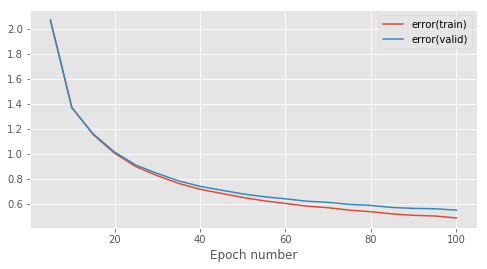

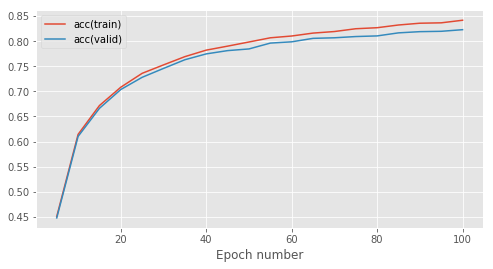

In [64]:
# Simple model with SGD and 3 hidden layers. To be used as baseline

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.005
batch = 100
num_epochs = 100
stats_interval = 5
input_dim, output_dim, hidden_dim = 784, 47, 100

train_data.reset()
valid_data.reset()
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
res_sgd = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

Epoch 5: 1.3s to complete
    error(train)=1.20e+00, acc(train)=6.78e-01, error(valid)=1.28e+00, acc(valid)=6.67e-01


Epoch 10: 1.3s to complete
    error(train)=1.34e+00, acc(train)=6.46e-01, error(valid)=1.46e+00, acc(valid)=6.35e-01


Epoch 15: 2.3s to complete
    error(train)=1.50e+00, acc(train)=5.87e-01, error(valid)=1.71e+00, acc(valid)=5.73e-01


Epoch 20: 2.9s to complete
    error(train)=2.45e+00, acc(train)=2.86e-01, error(valid)=2.65e+00, acc(valid)=2.76e-01


Epoch 25: 2.8s to complete
    error(train)=3.99e+00, acc(train)=2.51e-01, error(valid)=5.13e+00, acc(valid)=2.49e-01


Epoch 30: 2.8s to complete
    error(train)=3.36e+00, acc(train)=6.77e-02, error(valid)=3.40e+00, acc(valid)=6.62e-02


Epoch 35: 2.7s to complete
    error(train)=3.48e+00, acc(train)=7.65e-02, error(valid)=3.97e+00, acc(valid)=7.42e-02


Epoch 40: 2.8s to complete
    error(train)=3.63e+00, acc(train)=6.39e-02, error(valid)=3.55e+00, acc(valid)=5.93e-02


Epoch 45: 2.6s to complete
    error(train)=3.83e+00, acc(train)=2.77e-02, error(valid)=3.83e+00, acc(valid)=2.73e-02


Epoch 50: 2.7s to complete
    error(train)=3.85e+00, acc(train)=2.16e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


Epoch 55: 3.1s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.41e-02


Epoch 60: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


Epoch 65: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


Epoch 70: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


Epoch 75: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.18e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


Epoch 80: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.18e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


Epoch 85: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


Epoch 90: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


Epoch 95: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02


Epoch 100: 3.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


Epoch 5: 1.3s to complete
    error(train)=5.89e-01, acc(train)=8.06e-01, error(valid)=6.92e-01, acc(valid)=7.91e-01


Epoch 10: 1.3s to complete
    error(train)=6.54e-01, acc(train)=7.96e-01, error(valid)=8.06e-01, acc(valid)=7.78e-01


Epoch 15: 1.8s to complete
    error(train)=6.87e-01, acc(train)=7.93e-01, error(valid)=9.03e-01, acc(valid)=7.73e-01


Epoch 20: 1.8s to complete
    error(train)=9.50e-01, acc(train)=7.75e-01, error(valid)=1.35e+00, acc(valid)=7.56e-01


Epoch 25: 1.9s to complete
    error(train)=8.91e-01, acc(train)=7.59e-01, error(valid)=1.25e+00, acc(valid)=7.38e-01


Epoch 30: 2.0s to complete
    error(train)=1.17e+00, acc(train)=7.12e-01, error(valid)=1.75e+00, acc(valid)=6.94e-01


Epoch 35: 2.2s to complete
    error(train)=1.70e+00, acc(train)=5.66e-01, error(valid)=2.27e+00, acc(valid)=5.52e-01


Epoch 40: 2.2s to complete
    error(train)=2.11e+00, acc(train)=5.40e-01, error(valid)=3.39e+00, acc(valid)=5.27e-01


Epoch 45: 2.2s to complete
    error(train)=4.01e+00, acc(train)=1.97e-01, error(valid)=6.30e+00, acc(valid)=1.92e-01


Epoch 50: 2.2s to complete
    error(train)=3.75e+00, acc(train)=5.54e-02, error(valid)=3.99e+00, acc(valid)=5.22e-02


Epoch 55: 2.2s to complete
    error(train)=3.78e+00, acc(train)=4.22e-02, error(valid)=3.78e+00, acc(valid)=3.95e-02


Epoch 60: 2.3s to complete
    error(train)=4.07e+00, acc(train)=5.01e-02, error(valid)=6.42e+00, acc(valid)=4.82e-02


Epoch 65: 2.4s to complete
    error(train)=3.81e+00, acc(train)=3.28e-02, error(valid)=4.45e+00, acc(valid)=3.11e-02


Epoch 70: 2.4s to complete
    error(train)=3.78e+00, acc(train)=4.31e-02, error(valid)=4.21e+00, acc(valid)=3.92e-02


Epoch 75: 2.6s to complete
    error(train)=3.74e+00, acc(train)=4.98e-02, error(valid)=4.33e+00, acc(valid)=4.65e-02


Epoch 80: 2.5s to complete
    error(train)=3.78e+00, acc(train)=3.80e-02, error(valid)=3.93e+00, acc(valid)=3.46e-02


Epoch 85: 2.6s to complete
    error(train)=3.78e+00, acc(train)=3.81e-02, error(valid)=4.08e+00, acc(valid)=3.29e-02


Epoch 90: 2.5s to complete
    error(train)=3.80e+00, acc(train)=3.43e-02, error(valid)=4.07e+00, acc(valid)=3.03e-02


Epoch 95: 2.5s to complete
    error(train)=3.79e+00, acc(train)=4.15e-02, error(valid)=4.27e+00, acc(valid)=3.88e-02


Epoch 100: 2.5s to complete
    error(train)=3.76e+00, acc(train)=4.47e-02, error(valid)=4.50e+00, acc(valid)=3.87e-02


Epoch 5: 1.4s to complete
    error(train)=5.05e-01, acc(train)=8.29e-01, error(valid)=5.85e-01, acc(valid)=8.08e-01


Epoch 10: 1.4s to complete
    error(train)=3.82e-01, acc(train)=8.63e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


Epoch 15: 1.5s to complete
    error(train)=3.18e-01, acc(train)=8.81e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


Epoch 20: 1.5s to complete
    error(train)=2.71e-01, acc(train)=8.97e-01, error(valid)=5.52e-01, acc(valid)=8.37e-01


Epoch 25: 1.5s to complete
    error(train)=2.59e-01, acc(train)=9.00e-01, error(valid)=6.23e-01, acc(valid)=8.29e-01


Epoch 30: 1.5s to complete
    error(train)=2.12e-01, acc(train)=9.16e-01, error(valid)=6.40e-01, acc(valid)=8.35e-01


Epoch 35: 1.6s to complete
    error(train)=2.03e-01, acc(train)=9.19e-01, error(valid)=7.38e-01, acc(valid)=8.31e-01


Epoch 40: 1.5s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=7.95e-01, acc(valid)=8.28e-01


Epoch 45: 1.4s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=8.76e-01, acc(valid)=8.23e-01


Epoch 50: 1.5s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=9.44e-01, acc(valid)=8.20e-01


Epoch 55: 1.5s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=1.02e+00, acc(valid)=8.21e-01


Epoch 60: 1.5s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=1.11e+00, acc(valid)=8.23e-01


Epoch 65: 1.5s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=1.12e+00, acc(valid)=8.21e-01


Epoch 70: 1.4s to complete
    error(train)=1.66e-01, acc(train)=9.35e-01, error(valid)=1.28e+00, acc(valid)=8.18e-01


Epoch 75: 1.5s to complete
    error(train)=1.44e-01, acc(train)=9.42e-01, error(valid)=1.34e+00, acc(valid)=8.17e-01


Epoch 80: 1.4s to complete
    error(train)=1.34e-01, acc(train)=9.46e-01, error(valid)=1.37e+00, acc(valid)=8.23e-01


Epoch 85: 1.4s to complete
    error(train)=1.32e-01, acc(train)=9.47e-01, error(valid)=1.48e+00, acc(valid)=8.18e-01


Epoch 90: 1.4s to complete
    error(train)=1.37e-01, acc(train)=9.46e-01, error(valid)=1.56e+00, acc(valid)=8.21e-01


Epoch 95: 1.4s to complete
    error(train)=1.51e-01, acc(train)=9.42e-01, error(valid)=1.69e+00, acc(valid)=8.15e-01


Epoch 100: 1.4s to complete
    error(train)=1.26e-01, acc(train)=9.49e-01, error(valid)=1.65e+00, acc(valid)=8.17e-01


Epoch 5: 1.3s to complete
    error(train)=5.91e-01, acc(train)=8.11e-01, error(valid)=6.35e-01, acc(valid)=8.00e-01


Epoch 10: 1.3s to complete
    error(train)=4.55e-01, acc(train)=8.48e-01, error(valid)=5.46e-01, acc(valid)=8.20e-01


Epoch 15: 1.4s to complete
    error(train)=3.92e-01, acc(train)=8.64e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


Epoch 20: 1.4s to complete
    error(train)=3.37e-01, acc(train)=8.81e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 25: 1.4s to complete
    error(train)=3.07e-01, acc(train)=8.90e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


Epoch 30: 1.4s to complete
    error(train)=2.94e-01, acc(train)=8.90e-01, error(valid)=5.48e-01, acc(valid)=8.32e-01


Epoch 35: 1.4s to complete
    error(train)=2.61e-01, acc(train)=9.03e-01, error(valid)=5.64e-01, acc(valid)=8.35e-01


Epoch 40: 1.4s to complete
    error(train)=2.43e-01, acc(train)=9.06e-01, error(valid)=5.90e-01, acc(valid)=8.31e-01


Epoch 45: 1.4s to complete
    error(train)=2.22e-01, acc(train)=9.15e-01, error(valid)=6.11e-01, acc(valid)=8.33e-01


Epoch 50: 1.4s to complete
    error(train)=2.05e-01, acc(train)=9.21e-01, error(valid)=6.55e-01, acc(valid)=8.33e-01


Epoch 55: 1.4s to complete
    error(train)=1.95e-01, acc(train)=9.24e-01, error(valid)=6.86e-01, acc(valid)=8.27e-01


Epoch 60: 1.4s to complete
    error(train)=1.91e-01, acc(train)=9.25e-01, error(valid)=7.51e-01, acc(valid)=8.28e-01


Epoch 65: 1.4s to complete
    error(train)=1.87e-01, acc(train)=9.26e-01, error(valid)=7.96e-01, acc(valid)=8.16e-01


Epoch 70: 1.4s to complete
    error(train)=1.58e-01, acc(train)=9.37e-01, error(valid)=8.30e-01, acc(valid)=8.22e-01


Epoch 75: 1.5s to complete
    error(train)=1.46e-01, acc(train)=9.42e-01, error(valid)=8.71e-01, acc(valid)=8.21e-01


Epoch 80: 1.4s to complete
    error(train)=1.42e-01, acc(train)=9.43e-01, error(valid)=9.11e-01, acc(valid)=8.21e-01


Epoch 85: 1.5s to complete
    error(train)=1.42e-01, acc(train)=9.43e-01, error(valid)=9.65e-01, acc(valid)=8.22e-01


Epoch 90: 1.4s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=1.05e+00, acc(valid)=8.15e-01


Epoch 95: 1.4s to complete
    error(train)=1.28e-01, acc(train)=9.48e-01, error(valid)=1.11e+00, acc(valid)=8.21e-01


Epoch 100: 1.4s to complete
    error(train)=1.09e-01, acc(train)=9.57e-01, error(valid)=1.13e+00, acc(valid)=8.20e-01


Epoch 5: 1.3s to complete
    error(train)=1.05e+00, acc(train)=6.96e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


Epoch 10: 1.3s to complete
    error(train)=7.99e-01, acc(train)=7.61e-01, error(valid)=8.22e-01, acc(valid)=7.53e-01


Epoch 15: 1.4s to complete
    error(train)=6.84e-01, acc(train)=7.89e-01, error(valid)=7.18e-01, acc(valid)=7.80e-01


Epoch 20: 1.3s to complete
    error(train)=6.15e-01, acc(train)=8.07e-01, error(valid)=6.58e-01, acc(valid)=7.94e-01


Epoch 25: 1.3s to complete
    error(train)=5.67e-01, acc(train)=8.21e-01, error(valid)=6.15e-01, acc(valid)=8.07e-01


Epoch 30: 1.3s to complete
    error(train)=5.30e-01, acc(train)=8.30e-01, error(valid)=5.90e-01, acc(valid)=8.11e-01


Epoch 35: 1.4s to complete
    error(train)=4.98e-01, acc(train)=8.40e-01, error(valid)=5.66e-01, acc(valid)=8.21e-01


Epoch 40: 1.4s to complete
    error(train)=4.74e-01, acc(train)=8.46e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


Epoch 45: 1.4s to complete
    error(train)=4.55e-01, acc(train)=8.52e-01, error(valid)=5.41e-01, acc(valid)=8.26e-01


Epoch 50: 1.4s to complete
    error(train)=4.39e-01, acc(train)=8.55e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


Epoch 55: 1.3s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


Epoch 60: 1.4s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


Epoch 65: 1.3s to complete
    error(train)=4.00e-01, acc(train)=8.66e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


Epoch 70: 1.4s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


Epoch 75: 1.4s to complete
    error(train)=3.75e-01, acc(train)=8.74e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


Epoch 80: 1.3s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


Epoch 85: 1.4s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


Epoch 90: 1.4s to complete
    error(train)=3.47e-01, acc(train)=8.81e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


Epoch 95: 1.5s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=5.23e-01, acc(valid)=8.35e-01


Epoch 100: 1.4s to complete
    error(train)=3.33e-01, acc(train)=8.85e-01, error(valid)=5.19e-01, acc(valid)=8.39e-01


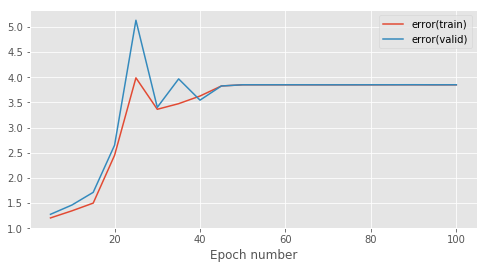

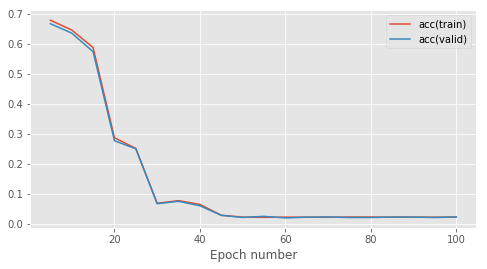

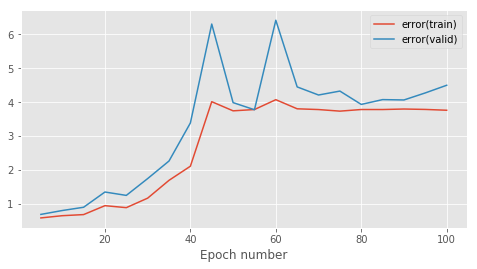

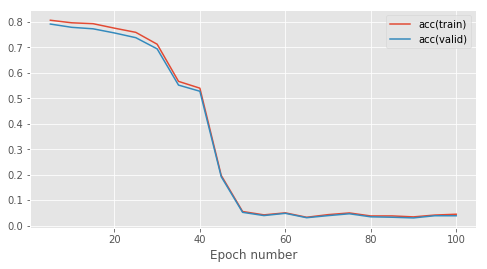

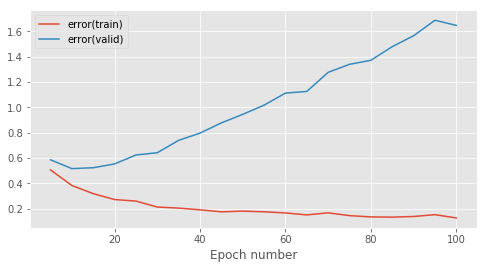

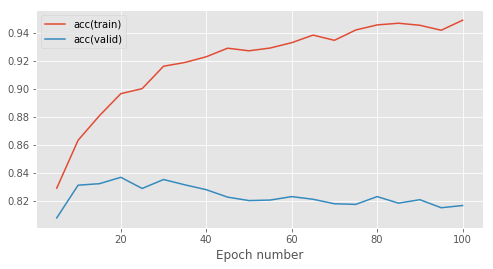

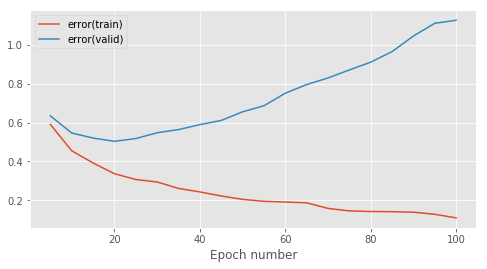

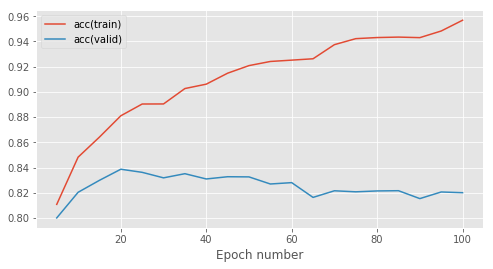

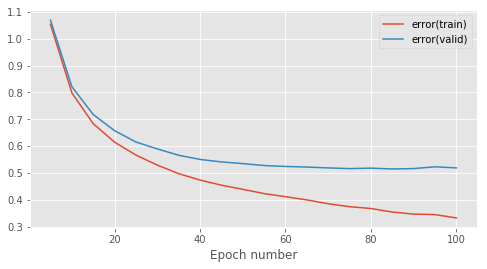

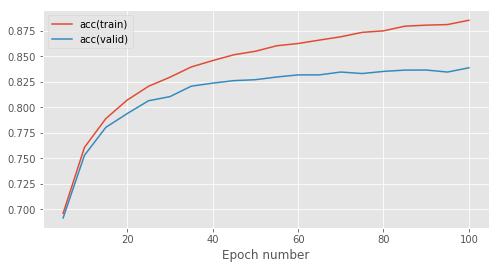

In [6]:
# Simple model with SGD and 3 hidden layers. To be used as baseline

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import RMSPropLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rates = [0.01, 0.005, 0.001, 0.0005, 0.0001]
batch = 100
num_epochs = 100
stats_interval = 5
input_dim, output_dim, hidden_dim = 784, 47, 100

res_rms = []

for learning_rate in learning_rates:
    train_data.reset()
    valid_data.reset()
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = RMSPropLearningRule(learning_rate=learning_rate)
#     learning_rule.reset()

    #Remember to use notebook=False when you write a script to be run in a terminal
    res = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
    res = res, learning_rate, "rms"
    res_rms.append(res)
    

Epoch 5: 2.1s to complete
    error(train)=6.93e-01, acc(train)=7.78e-01, error(valid)=7.84e-01, acc(valid)=7.63e-01


Epoch 10: 2.2s to complete
    error(train)=6.14e-01, acc(train)=8.03e-01, error(valid)=7.32e-01, acc(valid)=7.81e-01


Epoch 15: 3.1s to complete
    error(train)=6.01e-01, acc(train)=8.13e-01, error(valid)=7.22e-01, acc(valid)=7.92e-01


Epoch 20: 3.7s to complete
    error(train)=5.98e-01, acc(train)=8.17e-01, error(valid)=7.40e-01, acc(valid)=7.93e-01


Epoch 25: 3.4s to complete
    error(train)=6.06e-01, acc(train)=8.11e-01, error(valid)=7.50e-01, acc(valid)=7.87e-01


Epoch 30: 3.8s to complete
    error(train)=5.95e-01, acc(train)=8.23e-01, error(valid)=7.48e-01, acc(valid)=7.99e-01


Epoch 35: 3.3s to complete
    error(train)=5.68e-01, acc(train)=8.23e-01, error(valid)=7.35e-01, acc(valid)=7.96e-01


Epoch 40: 3.7s to complete
    error(train)=6.06e-01, acc(train)=8.14e-01, error(valid)=7.72e-01, acc(valid)=7.88e-01


Epoch 45: 3.4s to complete
    error(train)=5.98e-01, acc(train)=8.22e-01, error(valid)=7.68e-01, acc(valid)=7.94e-01


Epoch 50: 3.5s to complete
    error(train)=5.44e-01, acc(train)=8.38e-01, error(valid)=7.38e-01, acc(valid)=8.11e-01


Epoch 55: 3.5s to complete
    error(train)=5.90e-01, acc(train)=8.27e-01, error(valid)=7.70e-01, acc(valid)=7.98e-01


Epoch 60: 3.6s to complete
    error(train)=7.03e-01, acc(train)=8.02e-01, error(valid)=8.94e-01, acc(valid)=7.74e-01


Epoch 65: 3.8s to complete
    error(train)=6.03e-01, acc(train)=8.25e-01, error(valid)=7.96e-01, acc(valid)=7.96e-01


Epoch 70: 3.6s to complete
    error(train)=6.46e-01, acc(train)=8.15e-01, error(valid)=8.26e-01, acc(valid)=7.88e-01


Epoch 75: 3.9s to complete
    error(train)=6.24e-01, acc(train)=8.18e-01, error(valid)=8.11e-01, acc(valid)=7.90e-01


Epoch 80: 3.5s to complete
    error(train)=6.41e-01, acc(train)=8.14e-01, error(valid)=8.24e-01, acc(valid)=7.88e-01


Epoch 85: 3.7s to complete
    error(train)=6.39e-01, acc(train)=8.16e-01, error(valid)=8.48e-01, acc(valid)=7.87e-01


Epoch 90: 3.6s to complete
    error(train)=6.20e-01, acc(train)=8.17e-01, error(valid)=8.32e-01, acc(valid)=7.90e-01


Epoch 95: 3.4s to complete
    error(train)=7.53e-01, acc(train)=7.92e-01, error(valid)=9.59e-01, acc(valid)=7.67e-01


Epoch 100: 3.6s to complete
    error(train)=8.76e-01, acc(train)=7.52e-01, error(valid)=1.07e+00, acc(valid)=7.24e-01


Epoch 5: 1.9s to complete
    error(train)=4.89e-01, acc(train)=8.32e-01, error(valid)=5.89e-01, acc(valid)=8.10e-01


Epoch 10: 2.2s to complete
    error(train)=4.36e-01, acc(train)=8.47e-01, error(valid)=5.77e-01, acc(valid)=8.21e-01


Epoch 15: 2.3s to complete
    error(train)=4.28e-01, acc(train)=8.47e-01, error(valid)=5.91e-01, acc(valid)=8.16e-01


Epoch 20: 2.5s to complete
    error(train)=4.12e-01, acc(train)=8.55e-01, error(valid)=6.09e-01, acc(valid)=8.23e-01


Epoch 25: 2.4s to complete
    error(train)=3.83e-01, acc(train)=8.63e-01, error(valid)=6.11e-01, acc(valid)=8.24e-01


Epoch 30: 2.4s to complete
    error(train)=3.78e-01, acc(train)=8.65e-01, error(valid)=6.13e-01, acc(valid)=8.26e-01


Epoch 35: 2.6s to complete
    error(train)=3.56e-01, acc(train)=8.72e-01, error(valid)=6.34e-01, acc(valid)=8.27e-01


Epoch 40: 2.8s to complete
    error(train)=3.54e-01, acc(train)=8.74e-01, error(valid)=6.51e-01, acc(valid)=8.27e-01


Epoch 45: 2.8s to complete
    error(train)=3.41e-01, acc(train)=8.77e-01, error(valid)=6.85e-01, acc(valid)=8.26e-01


Epoch 50: 2.5s to complete
    error(train)=3.64e-01, acc(train)=8.72e-01, error(valid)=6.86e-01, acc(valid)=8.24e-01


Epoch 55: 2.5s to complete
    error(train)=3.53e-01, acc(train)=8.74e-01, error(valid)=6.99e-01, acc(valid)=8.22e-01


Epoch 60: 2.5s to complete
    error(train)=3.46e-01, acc(train)=8.80e-01, error(valid)=7.20e-01, acc(valid)=8.26e-01


Epoch 65: 2.4s to complete
    error(train)=3.44e-01, acc(train)=8.79e-01, error(valid)=7.33e-01, acc(valid)=8.26e-01


Epoch 70: 2.4s to complete
    error(train)=3.14e-01, acc(train)=8.89e-01, error(valid)=7.54e-01, acc(valid)=8.29e-01


Epoch 75: 2.4s to complete
    error(train)=3.30e-01, acc(train)=8.86e-01, error(valid)=7.07e-01, acc(valid)=8.28e-01


Epoch 80: 2.4s to complete
    error(train)=3.35e-01, acc(train)=8.85e-01, error(valid)=7.73e-01, acc(valid)=8.23e-01


Epoch 85: 2.4s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=7.74e-01, acc(valid)=8.26e-01


Epoch 90: 2.5s to complete
    error(train)=3.22e-01, acc(train)=8.88e-01, error(valid)=7.62e-01, acc(valid)=8.25e-01


Epoch 95: 2.5s to complete
    error(train)=3.30e-01, acc(train)=8.88e-01, error(valid)=8.10e-01, acc(valid)=8.27e-01


Epoch 100: 2.4s to complete
    error(train)=3.30e-01, acc(train)=8.88e-01, error(valid)=8.01e-01, acc(valid)=8.26e-01


Epoch 5: 1.9s to complete
    error(train)=4.78e-01, acc(train)=8.40e-01, error(valid)=5.54e-01, acc(valid)=8.20e-01


Epoch 10: 1.9s to complete
    error(train)=3.82e-01, acc(train)=8.62e-01, error(valid)=5.06e-01, acc(valid)=8.32e-01


Epoch 15: 1.9s to complete
    error(train)=3.35e-01, acc(train)=8.74e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


Epoch 20: 2.0s to complete
    error(train)=2.83e-01, acc(train)=8.94e-01, error(valid)=5.12e-01, acc(valid)=8.39e-01


Epoch 25: 1.9s to complete
    error(train)=2.52e-01, acc(train)=9.04e-01, error(valid)=5.39e-01, acc(valid)=8.39e-01


Epoch 30: 2.0s to complete
    error(train)=2.22e-01, acc(train)=9.12e-01, error(valid)=5.71e-01, acc(valid)=8.36e-01


Epoch 35: 2.0s to complete
    error(train)=2.14e-01, acc(train)=9.17e-01, error(valid)=6.10e-01, acc(valid)=8.31e-01


Epoch 40: 2.0s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=6.57e-01, acc(valid)=8.34e-01


Epoch 45: 2.0s to complete
    error(train)=1.81e-01, acc(train)=9.26e-01, error(valid)=7.03e-01, acc(valid)=8.32e-01


Epoch 50: 2.0s to complete
    error(train)=1.81e-01, acc(train)=9.25e-01, error(valid)=7.64e-01, acc(valid)=8.30e-01


Epoch 55: 2.0s to complete
    error(train)=1.60e-01, acc(train)=9.34e-01, error(valid)=7.93e-01, acc(valid)=8.30e-01


Epoch 60: 2.0s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=8.61e-01, acc(valid)=8.24e-01


Epoch 65: 2.0s to complete
    error(train)=1.45e-01, acc(train)=9.40e-01, error(valid)=8.91e-01, acc(valid)=8.25e-01


Epoch 70: 2.0s to complete
    error(train)=1.45e-01, acc(train)=9.40e-01, error(valid)=9.51e-01, acc(valid)=8.23e-01


Epoch 75: 2.0s to complete
    error(train)=1.37e-01, acc(train)=9.44e-01, error(valid)=9.84e-01, acc(valid)=8.25e-01


Epoch 80: 2.0s to complete
    error(train)=1.27e-01, acc(train)=9.47e-01, error(valid)=1.05e+00, acc(valid)=8.25e-01


Epoch 85: 2.0s to complete
    error(train)=1.19e-01, acc(train)=9.50e-01, error(valid)=1.07e+00, acc(valid)=8.26e-01


Epoch 90: 2.0s to complete
    error(train)=1.23e-01, acc(train)=9.49e-01, error(valid)=1.14e+00, acc(valid)=8.21e-01


Epoch 95: 2.0s to complete
    error(train)=1.21e-01, acc(train)=9.50e-01, error(valid)=1.17e+00, acc(valid)=8.19e-01


Epoch 100: 2.0s to complete
    error(train)=1.22e-01, acc(train)=9.51e-01, error(valid)=1.18e+00, acc(valid)=8.21e-01


Epoch 5: 1.9s to complete
    error(train)=5.73e-01, acc(train)=8.13e-01, error(valid)=6.18e-01, acc(valid)=8.03e-01


Epoch 10: 1.9s to complete
    error(train)=4.44e-01, acc(train)=8.50e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


Epoch 15: 1.9s to complete
    error(train)=3.86e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.31e-01


Epoch 20: 1.9s to complete
    error(train)=3.39e-01, acc(train)=8.80e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


Epoch 25: 1.9s to complete
    error(train)=3.14e-01, acc(train)=8.85e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 30: 1.9s to complete
    error(train)=2.80e-01, acc(train)=8.97e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 35: 2.0s to complete
    error(train)=2.70e-01, acc(train)=8.99e-01, error(valid)=5.46e-01, acc(valid)=8.35e-01


Epoch 40: 1.9s to complete
    error(train)=2.46e-01, acc(train)=9.07e-01, error(valid)=5.59e-01, acc(valid)=8.34e-01


Epoch 45: 1.9s to complete
    error(train)=2.34e-01, acc(train)=9.10e-01, error(valid)=5.80e-01, acc(valid)=8.31e-01


Epoch 50: 1.9s to complete
    error(train)=2.13e-01, acc(train)=9.18e-01, error(valid)=6.03e-01, acc(valid)=8.34e-01


Epoch 55: 2.2s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=6.43e-01, acc(valid)=8.29e-01


Epoch 60: 1.9s to complete
    error(train)=1.83e-01, acc(train)=9.28e-01, error(valid)=6.61e-01, acc(valid)=8.34e-01


Epoch 65: 1.9s to complete
    error(train)=1.69e-01, acc(train)=9.34e-01, error(valid)=6.98e-01, acc(valid)=8.30e-01


Epoch 70: 2.1s to complete
    error(train)=1.55e-01, acc(train)=9.38e-01, error(valid)=7.29e-01, acc(valid)=8.31e-01


Epoch 75: 2.0s to complete
    error(train)=1.66e-01, acc(train)=9.34e-01, error(valid)=7.91e-01, acc(valid)=8.25e-01


Epoch 80: 2.0s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=8.10e-01, acc(valid)=8.24e-01


Epoch 85: 1.9s to complete
    error(train)=1.38e-01, acc(train)=9.44e-01, error(valid)=8.68e-01, acc(valid)=8.26e-01


Epoch 90: 2.1s to complete
    error(train)=1.28e-01, acc(train)=9.48e-01, error(valid)=8.95e-01, acc(valid)=8.27e-01


Epoch 95: 2.3s to complete
    error(train)=1.51e-01, acc(train)=9.39e-01, error(valid)=9.65e-01, acc(valid)=8.19e-01


Epoch 100: 1.9s to complete
    error(train)=1.29e-01, acc(train)=9.46e-01, error(valid)=9.84e-01, acc(valid)=8.21e-01


Epoch 5: 1.8s to complete
    error(train)=9.37e-01, acc(train)=7.26e-01, error(valid)=9.48e-01, acc(valid)=7.24e-01


Epoch 10: 1.9s to complete
    error(train)=7.37e-01, acc(train)=7.76e-01, error(valid)=7.60e-01, acc(valid)=7.72e-01


Epoch 15: 1.8s to complete
    error(train)=6.46e-01, acc(train)=7.99e-01, error(valid)=6.79e-01, acc(valid)=7.93e-01


Epoch 20: 1.9s to complete
    error(train)=5.87e-01, acc(train)=8.15e-01, error(valid)=6.31e-01, acc(valid)=8.06e-01


Epoch 25: 1.9s to complete
    error(train)=5.46e-01, acc(train)=8.26e-01, error(valid)=6.00e-01, acc(valid)=8.10e-01


Epoch 30: 1.9s to complete
    error(train)=5.13e-01, acc(train)=8.35e-01, error(valid)=5.77e-01, acc(valid)=8.17e-01


Epoch 35: 1.9s to complete
    error(train)=4.83e-01, acc(train)=8.44e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


Epoch 40: 1.9s to complete
    error(train)=4.62e-01, acc(train)=8.49e-01, error(valid)=5.46e-01, acc(valid)=8.24e-01


Epoch 45: 2.1s to complete
    error(train)=4.42e-01, acc(train)=8.56e-01, error(valid)=5.32e-01, acc(valid)=8.27e-01


Epoch 50: 1.9s to complete
    error(train)=4.30e-01, acc(train)=8.58e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01


Epoch 55: 1.9s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 60: 1.9s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


Epoch 65: 1.9s to complete
    error(train)=3.85e-01, acc(train)=8.70e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


Epoch 70: 1.9s to complete
    error(train)=3.75e-01, acc(train)=8.74e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 75: 1.9s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


Epoch 80: 1.9s to complete
    error(train)=3.54e-01, acc(train)=8.80e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


Epoch 85: 2.0s to complete
    error(train)=3.46e-01, acc(train)=8.82e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


Epoch 90: 2.0s to complete
    error(train)=3.38e-01, acc(train)=8.85e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 95: 1.9s to complete
    error(train)=3.34e-01, acc(train)=8.86e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 100: 2.0s to complete
    error(train)=3.22e-01, acc(train)=8.90e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


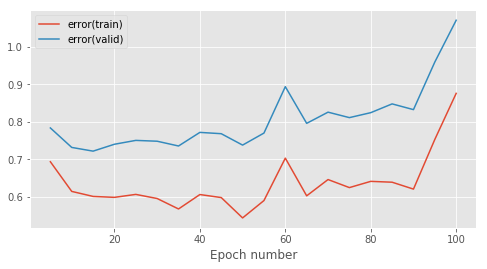

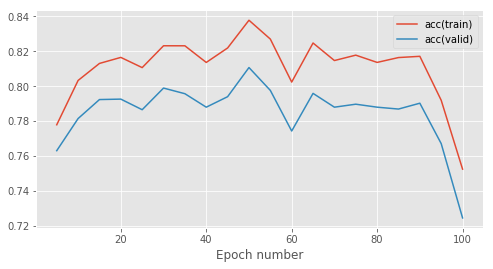

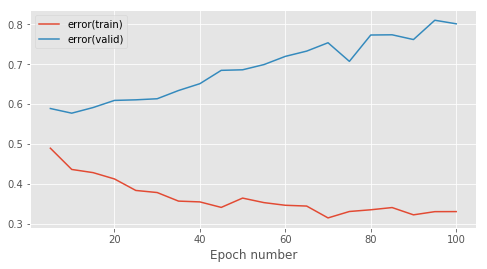

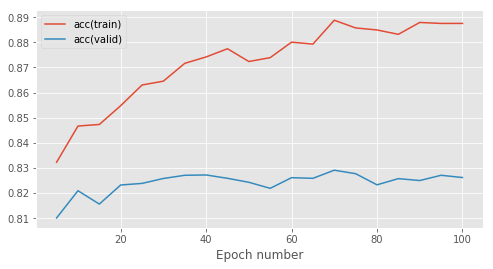

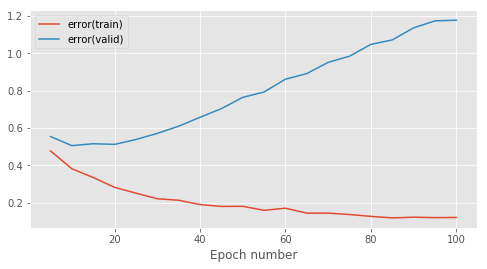

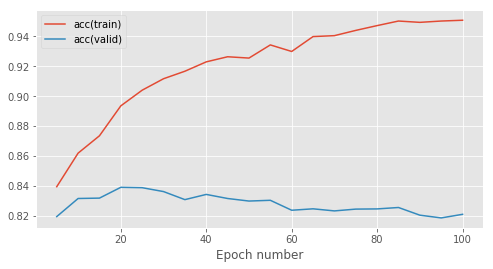

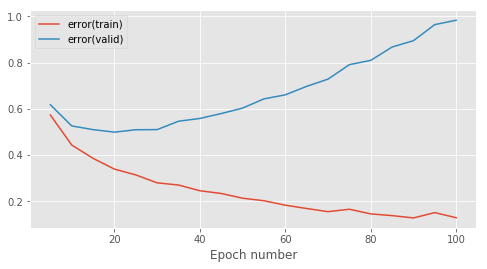

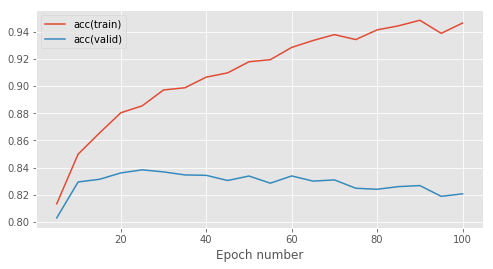

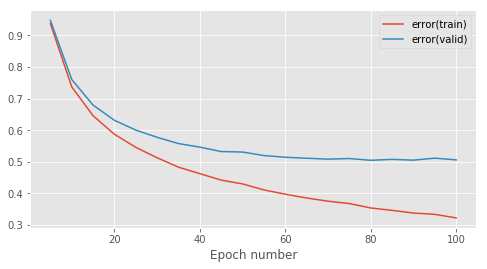

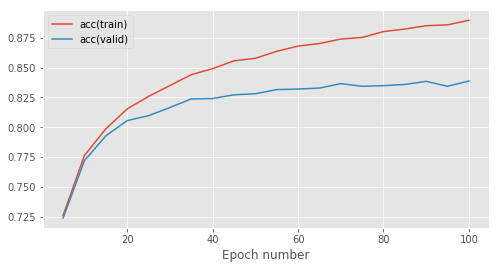

In [7]:
# Simple model with SGD and 3 hidden layers. To be used as baseline

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rates = [0.01, 0.005, 0.001, 0.0005, 0.0001]
batch = 100
num_epochs = 100
stats_interval = 5
input_dim, output_dim, hidden_dim = 784, 47, 100

res_adam = []

for learning_rate in learning_rates:
    train_data.reset()
    valid_data.reset()
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)
#     learning_rule.reset()

    #Remember to use notebook=False when you write a script to be run in a terminal
    res = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
    res = res, learning_rate, "adam"
    res_adam.append(res)

8
Learing rate: 0.01
Training time is rms
Error in train 3.851129598202143
Error in valid 3.8515932467465737
8
Learing rate: 0.005
Training time is rms
Error in train 3.7623817246560582
Error in valid 4.498931513361857
8
Learing rate: 0.001
Training time is rms
Error in train 0.1256684524182244
Error in valid 1.6459635519121651
8
Learing rate: 0.0005
Training time is rms
Error in train 0.10944527418036329
Error in valid 1.126652584002917
8
Learing rate: 0.0001
Training time is rms
Error in train 0.33280462703196007
Error in valid 0.5190221660180988


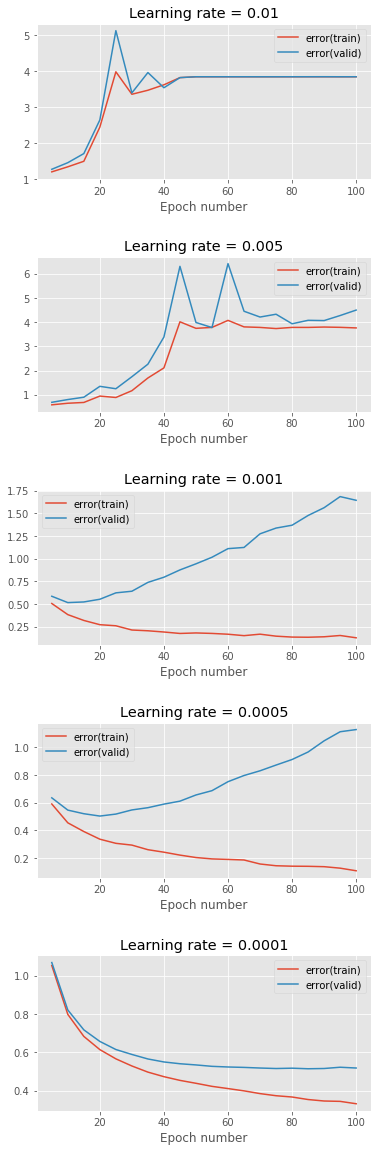

In [36]:
# Go over all experiments and plots stats of each along with their plots

fig, axs = plt.subplots(5,1, figsize=(6, 20))
# plt.suptitle("Adam optimisation with different learning rates")


for idx, each in enumerate(res_rms):
    stat, learn, name = each
    print(len(stat))
    stats, keys, run_time, _, _, _, _, learn = stat
    error_valid = stats[:,keys['error(valid)']][-1]
    error_train = stats[:,keys['error(train)']][-1]
    print("Learing rate:", learn)
    print("Training time is", each[2])
    print("Error in train", error_train)
    print("Error in valid", error_valid)

    for k in ["error(train)", 'error(valid)']:
        axs[idx].plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    axs[idx].legend(loc=0)
    axs[idx].set_xlabel('Epoch number')
    axs[idx].set_title("Learning rate = " + str(learn))
    
plt.subplots_adjust(hspace=0.5)
plt.savefig("ex2_rms.pdf")
        

In [62]:
top_res = [res_sgd, res_rms[-1][0], res_adam[-1][0]]
top_res_str = ["SGD", "RMSProp", "Adam"]

Training time is 122.60054683685303
Error in train 3.680807778476222
Error in valid 3.6822600421013485
Training time is 150.26485514640808
Error in train 0.33280462703196007
Error in valid 0.5190221660180988
Training time is 203.8295557498932
Error in train 0.32242659434367676
Error in valid 0.5060059308506594


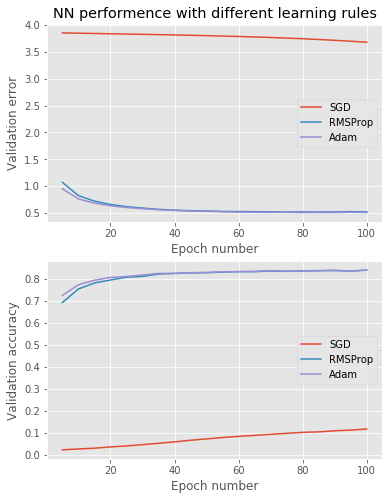

In [63]:
# plot the results from multile experiments onto one plot
# fig_1 = plt.figure(figsize=(6, 4))
# ax_1 = fig_1.add_subplot(111)

fig, axs = plt.subplots(2,1, figsize=(6, 8))

for idx, each in enumerate(top_res):
    stats, keys, run_time, _, _, _, _, _ = each
    error_valid = stats[:,keys['error(valid)']][-1]
    error_train = stats[:,keys['error(train)']][-1]
    print("Training time is", each[2])
    print("Error in train", error_train)
    print("Error in valid", error_valid)
    axs[0].plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:, keys["error(valid)"]], label=str(top_res_str[idx]))
    axs[1].plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:, keys["acc(valid)"]], label=str(top_res_str[idx]))
    axs[0].legend(loc=0)
    axs[0].set_xlabel('Epoch number')
    axs[0].set_ylabel('Validation error')
    axs[0].set_title('NN performence with different learning rules')
                        
    axs[1].legend(loc=0)
    axs[1].set_xlabel('Epoch number')
    axs[1].set_ylabel('Validation accuracy')
#     axs[1].set_title('NN performence with different learning rules')
    plt.savefig("ex2_comparison.pdf")